<a href="https://colab.research.google.com/github/JeromeMberia/user_review_analysis/blob/main/user_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing (NLP)

## Specifying the question

Predict if each textual review is an exchange letters to a good review meaning the customer is happy alternatively a bad one meaning the customer is not satisfied.

### Installing, Importing Essential Libraries, and loading Dataset

In [ ]:
# Installing required packages. 
!pip install wordnet

!pip install wordninja  # used to  split concatenated words into separate words
!pip3 install textblob
!pip install nltk

!pip install textstat


In [ ]:
# Importing our Essential Libraries
import pandas as pd      # library for data manipulation and analysis
import numpy as np       # library for performin scientific computations
import matplotlib.pyplot as plt  # library for performin scientific computations
import seaborn as sns            # library for creating rich data visualisations


from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import nltk

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk import word_tokenize, ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import wordninja 
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
import spacy #for training the NER model tokenize words
import random
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#uploading and readin the dataset
data = pd.read_csv("/content/user_review_data.csv")
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


### Checking the Data

In [ ]:
#checking the top 5 rows
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


In [ ]:
#checking the bottom 5 rows
data.tail()

,review_body,star_rating
14995,"I have a TAG Heuer carrera twin time watch, wh...",5
14996,It is hard sometimes to judge a product by its...,5
14997,reloj en perfecto estado llego todo a tiempo l...,5
14998,This is my third ironman. There are more expe...,5
14999,i use it everyday,5


Observation: the data dataset is uniform from top to the borrom. 

In [ ]:
#Getting the dataset shape.
data.shape

(15000, 2)

Observation: dataset has 15000 records and two variables/field/colunms. 

In [ ]:
##Get the summary of this dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  15000 non-null  object
 1   star_rating  15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


observation: our dataset comprise of object and integer datatype. both colunms has 15000 values, this is a clue of no missing values. 

In [ ]:
#checking the body_review variable values
data['review_body'].sample(n=10, random_state=610)

3293     The delivery was prompt. I got the correct pro...
5328                                    not silent running
13737                                         good quality
3751     not happy<br /><br />  the band is very stiff ...
14280                                            Excellent
7552                 A backlight would be a useful feature
13104    So far so good with this product. My fiancée i...
11599    This is a nice watch, however it is a little h...
6004     IT IS OK. SEEMS TO BE A GOOD QUALITY. I RECOME...
2401     Similar to this watch. Undelivered to this dat...
Name: review_body, dtype: object

observation: the values comprises of words, symbols, panctuations and so on.

In [ ]:
#Using groupby will check the data
data.groupby('star_rating').describe()

review_body                       
                  count unique        top freq
star_rating                                   
1                  3000   2935        bad    3
2                  3000   2896         ok    4
3                  3000   2905       good    7
4                  3000   2929       Good   11
5                  3000   2896  Excellent    8

observation: this is the preview of dataset based on the rating. all the star rating have similar value count. 

In [ ]:
#previewing the dataset variables
data.columns

Index(['review_body', 'star_rating'], dtype='object')

observation: the two colunms are, review_body, and star_rating

## Pre Processing the Data.

Here we will check for remove any unnecessary variables/features/columns if any, duplicates and  other preprocessing procedures are tokenizing(spliting), and lemmatization.


### Data cleaning

In [ ]:
#Checking for duplicates
data.duplicated().sum()

439

observation: there are 439 duplicates.

In [ ]:
#dropping the duplicates
data.drop_duplicates(inplace=True)
#
#confirming no duplicates
data.duplicated().any()

False

observation: duplicates have been dropped.

In [ ]:
#checking for the missing values
data.isnull().sum()

review_body    0
star_rating    0
dtype: int64

observation: there is no missing values

In [ ]:
# Finding Rare and unique Words
# --
data_corpus1= data.copy()
#
rare_words= pd.Series(' '.join(data_corpus1.review_body).split()).value_counts()[-100:]
rare_words

Shower          1
(smooth,        1
J.P.,           1
+/-.            1
appearance;     1
               ..
jewelry&#34;    1
parallex        1
third)          1
inventor        1
open-heart      1
Length: 100, dtype: int64

In [ ]:
data_corpus= data.copy()

In [ ]:
#Removing panctuation, HTML, words containing numbers, and changing the whole review to lower case.
import re # this is library for regular expressions, we write our pre-processing function:
def clean_text_round1(text):
  '''Remove HTML tags, remove punctuation, make text lowercase, remove punctuation and remove words containing numbers.'''
  text = re.sub('<.*?>','', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = text.lower()
  text = re.sub('\d', '', text)
  return text

fix = lambda x: clean_text_round1(x)
data_corpus['review_body'] = pd.DataFrame(data_corpus.review_body.apply(fix))
data_corpus

,review_body,star_rating
0,good luck finding a reasonably priced band rep...,1
1,no i get dark on the first week with me i will...,1
2,i dont know if mine was a mistake but it clear...,1
3,the rod that holds the bracelet broke several ...,1
4,i bought watches one watch doesnot work at a...,1
...,...,...
14995,i have a tag heuer carrera twin time watch who...,5
14996,it is hard sometimes to judge a product by its...,5
14997,reloj en perfecto estado llego todo a tiempo l...,5
14998,this is my third ironman there are more expen...,5


In [ ]:
#import wordninja 
from textblob import TextBlob

# Performing our splitting 

# 
data_corpus['review_body'] = data_corpus.review_body.apply(lambda x: wordninja.split(str(TextBlob(x))))  
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x: ' '.join(x))
print(data_corpus.head())

                                         review_body  star_rating
0  good luck finding a reasonably priced band rep...            1
1  no i get dark on the first week with me i will...            1
2  i dont know if mine was a mistake but it clear...            1
3  the rod that holds the bracelet broke several ...            1
4  i bought watches one watch does not work at al...            1


In [ ]:
data_corpus.sample(50)

,review_body,star_rating
13039,this is my barbie for special occasion s watch...,5
10442,the watch came in a nice round container looks...,4
11135,this is a lightweight watch multifunction work...,4
14217,ordered this watch for my wife for her birthda...,5
10476,great watch been wanting one for a while the o...,4
2005,ordered this watch and got in the mail the s g...,1
2923,r epical is not original,1
5288,the length of this band runs smaller that most...,2
642,this watch piece of scrap it is not original i...,1
13301,very impressive in terms of appearance won the...,5


In [ ]:
data_corpus['review_body'] = data_corpus['review_body'].apply(nltk.word_tokenize)

In [ ]:
data_corpus['review_body']

0        [good, luck, finding, a, reasonably, priced, b...
1        [no, i, get, dark, on, the, first, week, with,...
2        [i, dont, know, if, mine, was, a, mistake, but...
3        [the, rod, that, holds, the, bracelet, broke, ...
4        [i, bought, watches, one, watch, does, not, wo...
                               ...                        
14995    [i, have, a, tag, heuer, carrera, twin, time, ...
14996    [it, is, hard, sometimes, to, judge, a, produc...
14997    [rel, oj, en, perfect, o, estado, l, lego, to,...
14998    [this, is, my, third, ironman, there, are, mor...
14999                               [i, use, it, everyday]
Name: review_body, Length: 14561, dtype: object

In [ ]:
data_corpus["review_body"][5]

['this',
 'watch',
 'would',
 'have',
 'been',
 'fantastic',
 'if',
 'it',
 'had',
 'nt',
 'been',
 'so',
 'hard',
 'to',
 'set',
 'up',
 'and',
 'actually',
 'worked',
 'properly',
 'it',
 'took',
 'so',
 'many',
 'tries',
 'to',
 'get',
 'it',
 'into',
 'the',
 'mode',
 'where',
 'we',
 'could',
 'set',
 'up',
 'hours',
 'minutes',
 'finally',
 'we',
 'did',
 'that',
 'then',
 'the',
 'watch',
 'screen',
 'wouldnt',
 'dim',
 'anymore',
 'eventually',
 'it',
 'got',
 'to',
 'the',
 'point',
 'where',
 'all',
 'of',
 'the',
 'lights',
 'turned',
 'off',
 'and',
 'would',
 'not',
 'come',
 'back',
 'on',
 'i',
 'would',
 'recommend',
 'to',
 'anyone',
 'that',
 'is',
 'considering',
 'buying',
 'this',
 'watch',
 'to',
 'spend',
 'a',
 'little',
 'extra',
 'money',
 'and',
 'get',
 'one',
 'that',
 'is',
 'better',
 'quality',
 'with',
 'this',
 'one',
 'you',
 'basically',
 'get',
 'what',
 'you',
 'paid',
 'for',
 'not',
 'a',
 'whole',
 'lot']

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

data_corpus['review_body'] = data_corpus['review_body'].apply(lemmatize_text)

In [ ]:
data_corpus['review_body']

0        [good, luck, finding, a, reasonably, priced, b...
1        [no, i, get, dark, on, the, first, week, with,...
2        [i, dont, know, if, mine, wa, a, mistake, but,...
3        [the, rod, that, hold, the, bracelet, broke, s...
4        [i, bought, watch, one, watch, doe, not, work,...
                               ...                        
14995    [i, have, a, tag, heuer, carrera, twin, time, ...
14996    [it, is, hard, sometimes, to, judge, a, produc...
14997    [rel, oj, en, perfect, o, estado, l, lego, to,...
14998    [this, is, my, third, ironman, there, are, mor...
14999                               [i, use, it, everyday]
Name: review_body, Length: 14561, dtype: object

In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x:remove_stopword(x))
data_corpus['review_body']

0        [good, luck, finding, reasonably, priced, band...
1          [get, dark, first, week, never, buy, item, buy]
2        [dont, know, mine, wa, mistake, clearly, state...
3        [rod, hold, bracelet, broke, several, time, co...
4        [bought, watch, one, watch, doe, work, watch, ...
                               ...                        
14995    [tag, heuer, carrera, twin, time, watch, whose...
14996    [hard, sometimes, judge, product, picture, wat...
14997    [rel, oj, en, perfect, estado, l, lego, tiempo...
14998    [third, ironman, expensive, sport, watch, iron...
14999                                      [use, everyday]
Name: review_body, Length: 14561, dtype: object

In [ ]:
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x: ' '.join(x))

cv = CountVectorizer()
text_1 = cv.fit_transform(data_corpus['review_body'])

In [ ]:
data_DTM = pd.DataFrame(text_1.toarray(), columns=cv.get_feature_names(), index=data_corpus.index)
data_DTM['star_rating'] = data_corpus['star_rating']
data_DTM.head()


,aaa,aaaa,aaaaaa,aad,ab,aba,abaj,abandon,abandoned,abb,abbreviation,abc,abd,abel,ability,able,ably,abnormal,abnormally,abo,abomination,abort,abou,abound,abrasion,abrasive,abroad,absence,absently,absolute,absolutely,absorb,absorbed,absorbent,absorbs,absurd,absurdly,abundant,abuse,abused,...,za,zac,zag,zd,ze,zebra,zed,zen,zenith,zeno,zeppelin,zero,zeroing,zest,zeus,zh,zhi,zi,zig,zillion,zing,zip,zipper,zippered,zippo,zl,zm,zn,zo,zodiac,zombie,zone,zoo,zooming,zulu,zum,zurich,zx,zy,star_rating
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_DTM.star_rating.unique()

array([1, 2, 3, 4, 5])

In [ ]:
data_DTM.shape

(14561, 12887)

In [ ]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        return "Negative"
    elif score['neg'] < score['pos']:
        return "Positive"
    else:
        return "Neutral"
data_corpus['sentiment']  = data_corpus['review_body'].apply(lambda x: sentiment_analyse(x)) 

In [ ]:
data_corpus.head()

,review_body,star_rating,sentiment
0,good luck finding reasonably priced band repla...,1,Negative
1,get dark first week never buy item buy,1,Neutral
2,dont know mine wa mistake clearly state aqua i...,1,Negative
3,rod hold bracelet broke several time company f...,1,Negative
4,bought watch one watch doe work watch run time...,1,Negative


In [ ]:
# extracting information
#function for rule 
def rule2(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [ ]:
#import spacy
import spacy
from spacy.matcher import Matcher 

from spacy import displacy 
from IPython.display import Image, display

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
data_corpus1=data_corpus.copy()
# data_corpus contains all the sentences from all the customer review
row_list = []


for index, row in data_corpus.iterrows():
  review_body = data_corpus1.loc[index,'review_body']
  star_rating = data_corpus1.loc[index,'star_rating']
  output = rule2(review_body)
  dict1 = {'star_rating':star_rating,'review_body':review_body,'selected_text':output}
  row_list.append(dict1)
    
df_rule2_all = pd.DataFrame(row_list)

In [ ]:
df_rule2_all

In [ ]:
# selecting non-empty outputs
data_corpus1= pd.DataFrame(columns=df_rule2_all.columns)

for row in range(len(df_rule2_all)):
    
    if len(df_rule2_all.loc[row,'selected_text'])!=0:
        data_corpus1 = data_corpus1.append(df_rule2_all.loc[row,:])

# reset the index
data_corpus1.reset_index(inplace=True)
data_corpus1.drop('index',axis=1,inplace=True)  

## Performing EDA(Exploratory Data Analysis)

Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling

In [ ]:
#looking  at the distribution of feedback in this data_corpus data
feedback_dist = data_corpus.groupby('sentiment').count()['review_body'].reset_index().sort_values(by='review_body',ascending=False)
feedback_dist.style.background_gradient(cmap='Purples')

,sentiment,review_body
2,Positive,10844
0,Negative,2680
1,Neutral,1037


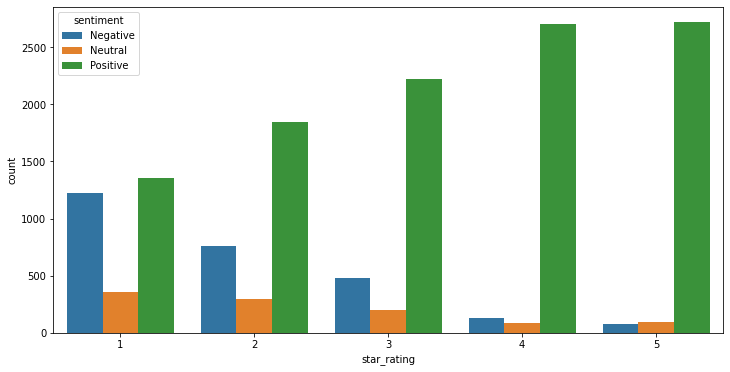

In [ ]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='star_rating', data = data_corpus, hue='sentiment')

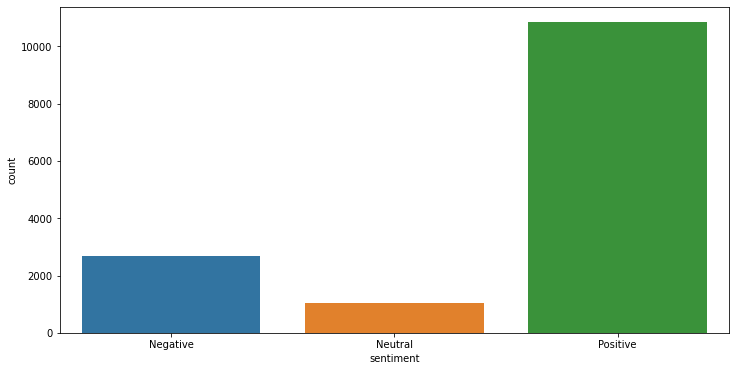

In [ ]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='sentiment',data=data_corpus)

observation: there is more positive customer reviews and neutral review is the least.

In [ ]:

from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =feedback_dist.sentiment,
    values = feedback_dist.review_body,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))


In [ ]:
fig.show()

observation: postive feedbacks translates to 75% of the total feedback 

Word Cloud

In [ ]:
stop_words = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=None, background_color="white", colormap="Dark2",
               max_font_size=100, random_state=42)

plt.rcParams['figure.figsize'] = [20, 20]

def word_cloud_view(selected_rating):
  if selected_rating == "all":
    feedback = data_corpus['review_body'].str.cat(sep=' ')
  else:
    selected_rating = int(selected_rating)
    feedback = data_corpus[data_corpus['star_rating']==selected_rating]['review_body'].str.cat(sep=' ')

  stopwords = stop_words
  querywords = feedback.split()

  resultwords  = [word for word in querywords if word.lower() not in stopwords]
  result = ' '.join(resultwords)

  wc.generate(result)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

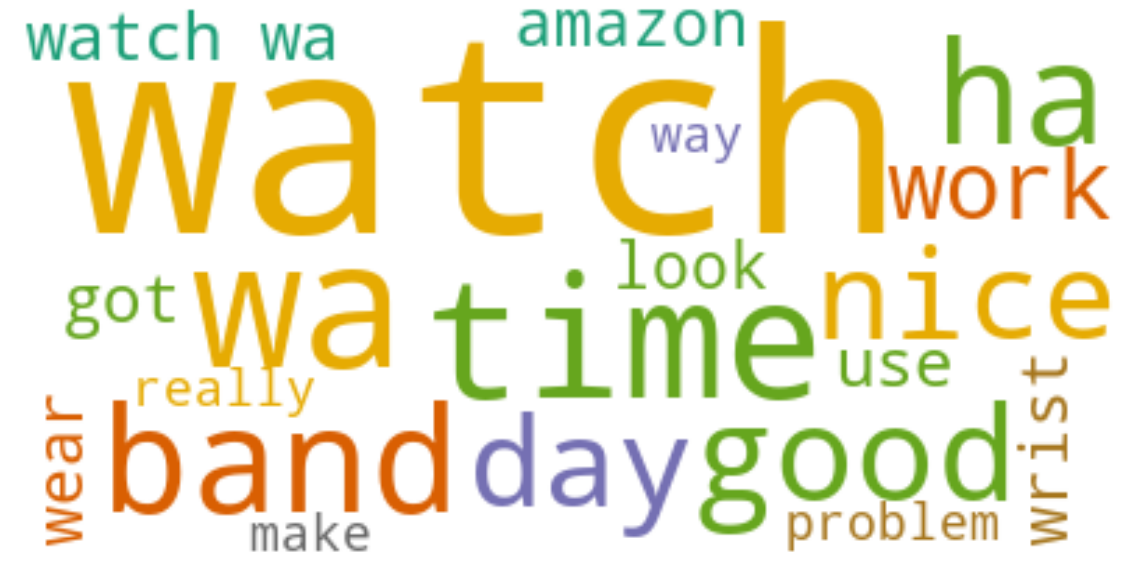

In [ ]:
word_cloud_view("all")

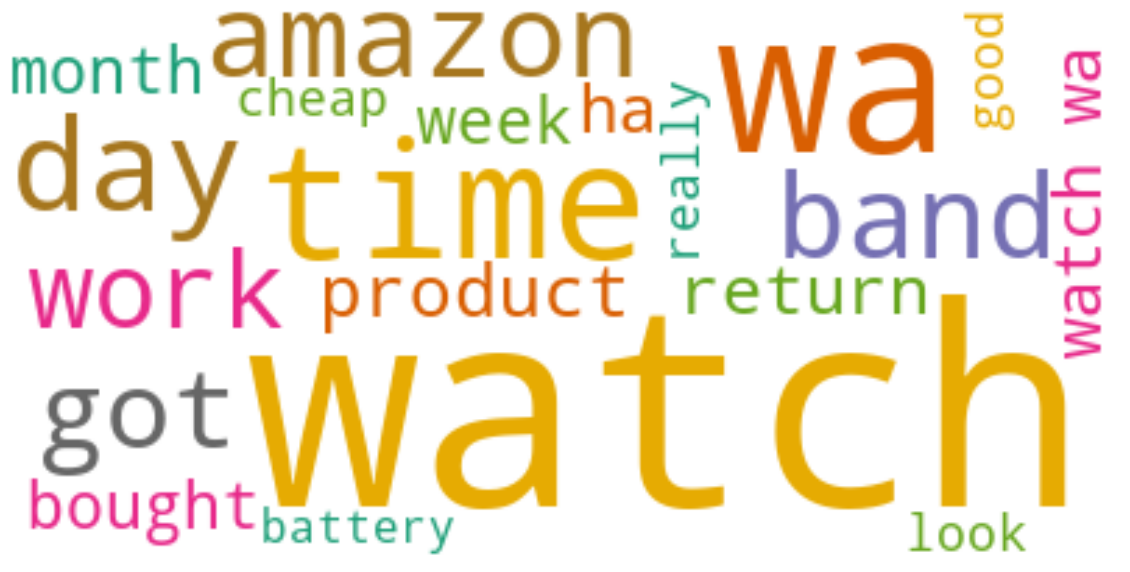

In [ ]:
word_cloud_view(1)

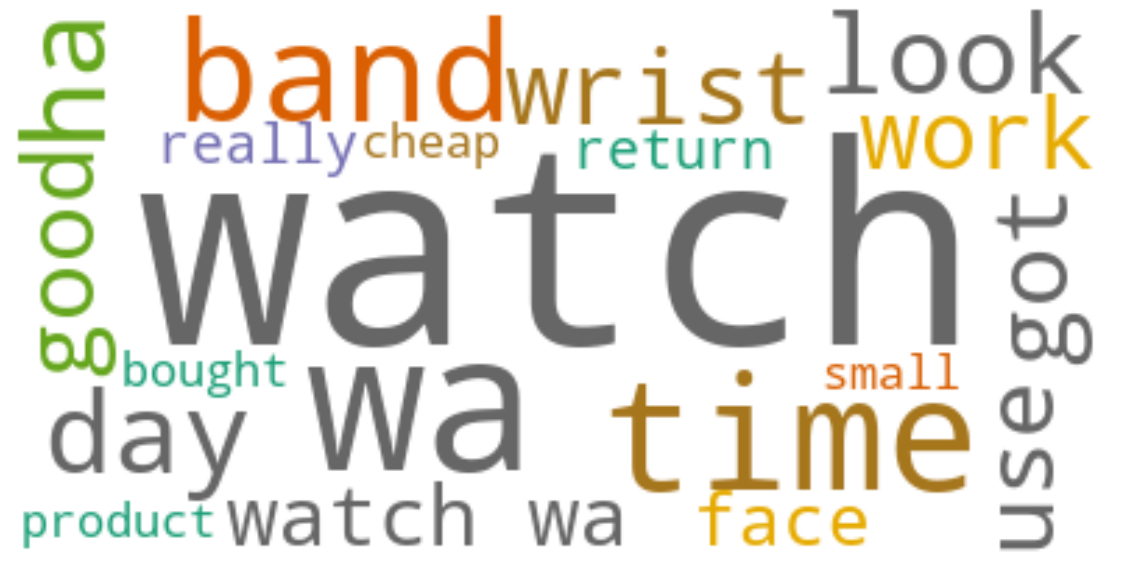

In [ ]:
word_cloud_view(2)

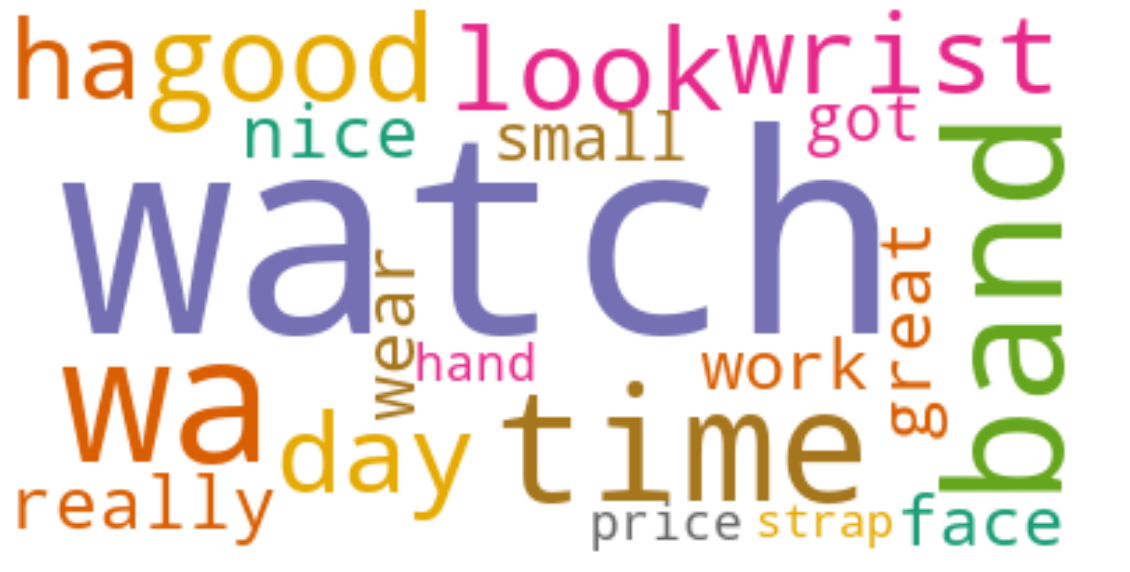

In [ ]:
word_cloud_view(3)

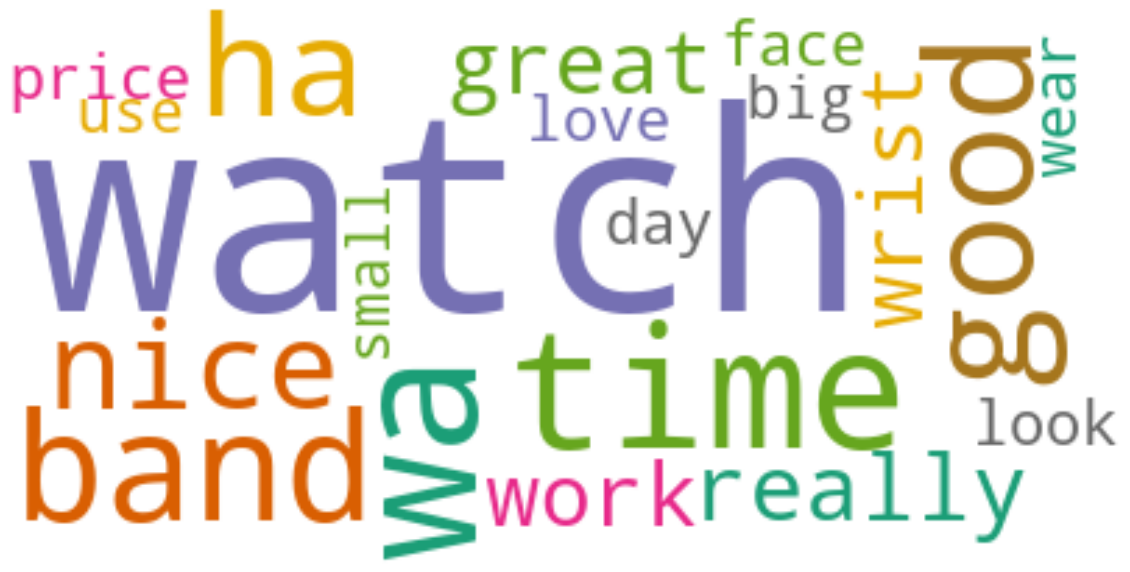

In [ ]:
word_cloud_view(4)

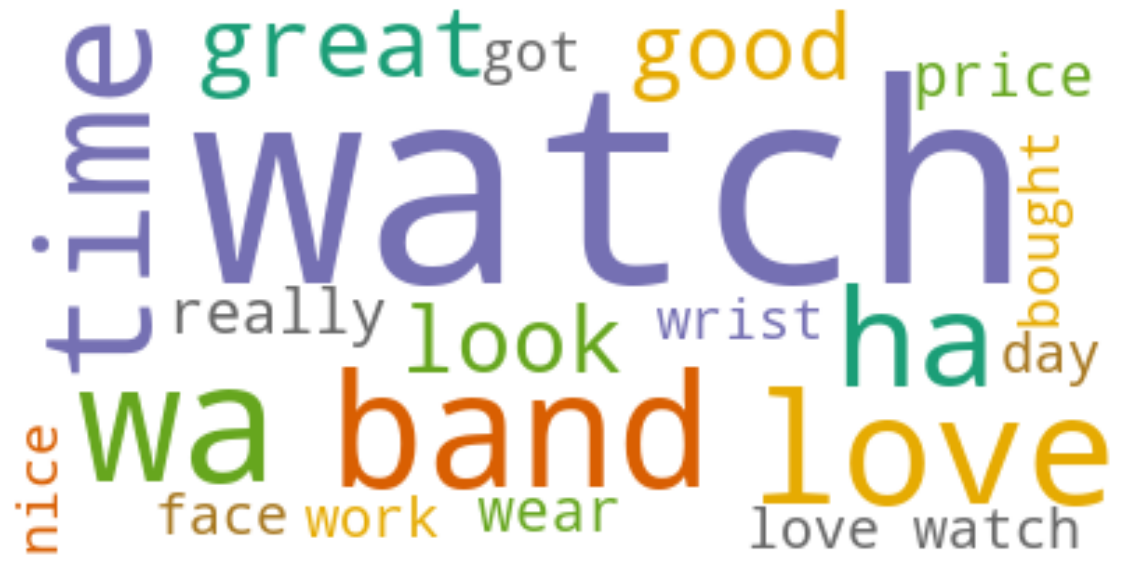

In [ ]:
word_cloud_view(5)

### Count / Density / Readability Features
### Language support

In [ ]:
import textstat

 List of Functions

Syllable Count

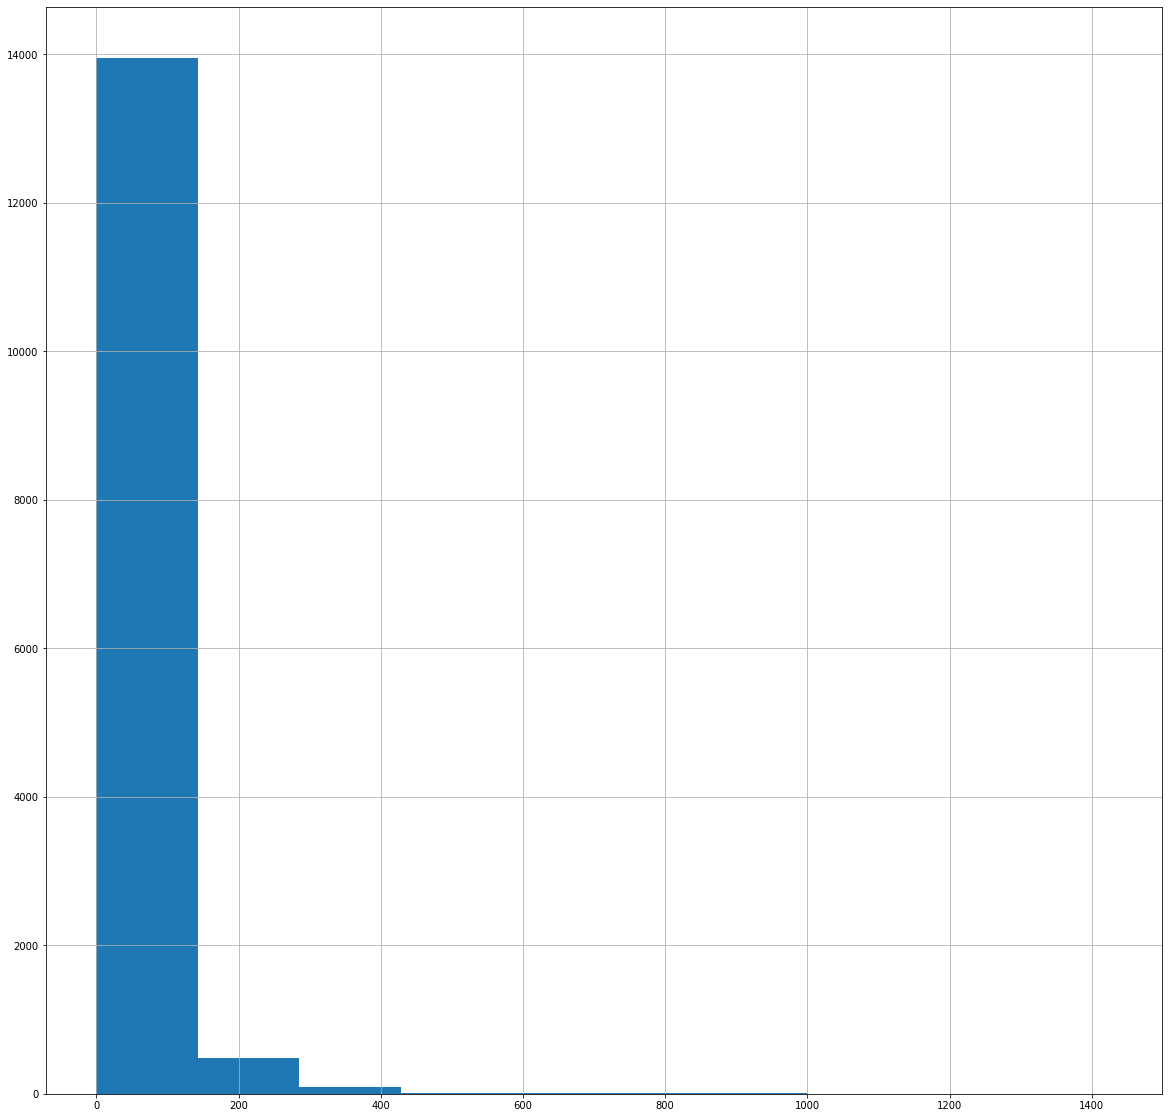

In [ ]:
data_corpus0= data_corpus.copy()
# Returns the number of syllables present
#textstat.syllable_count(data_corpus2['review_body'])
data_corpus0['syllable_count'] = data['review_body'].apply(lambda x: textstat.syllable_count(x))
data_corpus0['syllable_count'].hist()

Lexicon Count

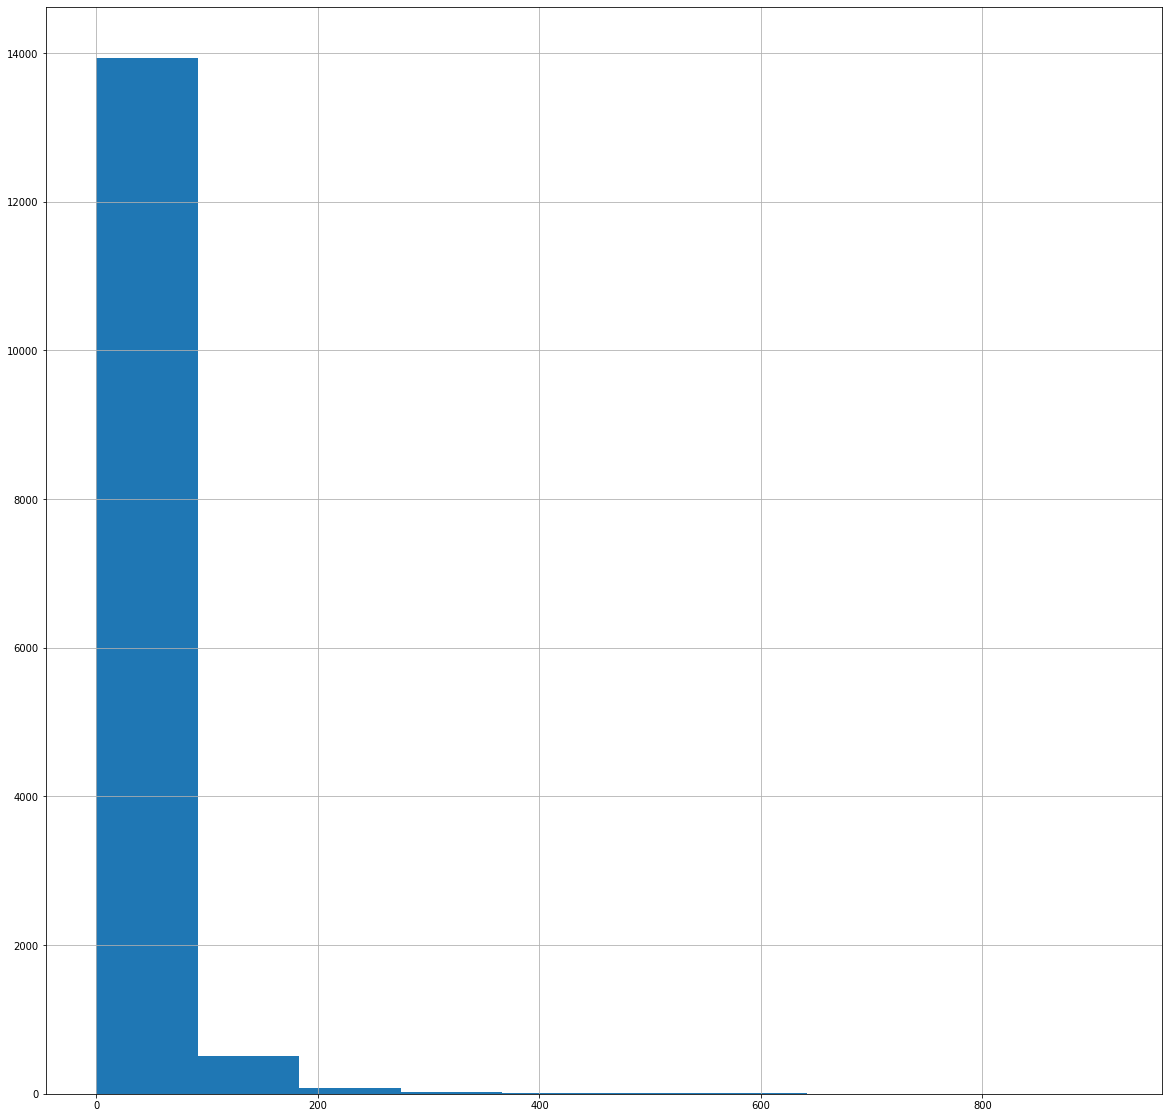

In [ ]:
#Calculates the number of words present
data_corpus0['lexicon_count'] = data['review_body'].apply(lambda x: textstat.lexicon_count(x))
data_corpus0['lexicon_count'].hist()
#textstat.lexicon_count(message_bagwords, removepunct=True)

Sentence Count

In [ ]:
#Returns the number of sentences present
#textstat.sentence_count(text)
data_corpus0['sentence_count'] = data['review_body'].apply(lambda x: textstat.sentence_count(x))
data_corpus0['sentence_count']

0        3
1        2
2        5
3        3
4        4
        ..
14995    5
14996    1
14997    1
14998    1
14999    1
Name: sentence_count, Length: 14561, dtype: int64

The Flesch Reading Ease formula

In [ ]:
#Returns the Flesch Reading Ease Score
#textstat.flesch_reading_ease(text)
data_corpus0['flesch_reading'] = data_corpus0['review_body'].apply(lambda x: textstat.flesch_reading_ease(x))
data_corpus0['flesch_reading']

0         49.83
1        105.66
2         36.29
3         65.05
4         66.41
          ...  
14995     -0.94
14996     20.39
14997     69.45
14998     67.76
14999     35.61
Name: flesch_reading, Length: 14561, dtype: float64

Automated Readability Index

In [ ]:
#Returns the ARI (Automated Readability Index) which outputs a number that approximates the grade level needed to comprehend the text.
#textstat.automated_readability_index(text)
data_corpus0['automated_readability'] = data_corpus0['review_body'].apply(lambda x: textstat.automated_readability_index(x))
data_corpus0['automated_readability']

0        21.3
1         0.8
2        23.9
3        12.4
4        17.1
         ... 
14995    38.2
14996    35.7
14997     7.1
14998     8.9
14999     5.5
Name: automated_readability, Length: 14561, dtype: float64

Linsear Write Formula

In [ ]:
#Returns the grade level using the Linsear Write Formula
#textstat.linsear_write_formula(text)
data_corpus0['linsear_write_formula'] = data_corpus0['review_body'].apply(lambda x: textstat.linsear_write_formula(x))
data_corpus0['linsear_write_formula']

0        23.0
1         3.0
2        24.5
3        15.5
4        17.0
         ... 
14995    42.5
14996    37.5
14997    14.5
14998     6.0
14999     1.0
Name: linsear_write_formula, Length: 14561, dtype: float64

Dale-Chall Readability Score

In [ ]:
 #lookup table of the most commonly used 3000 English words
#textstat.dale_chall_readability_score(text)
data_corpus0['dale_chall_readability_score'] = data_corpus0['review_body'].apply(lambda x: textstat.dale_chall_readability_score(x))
data_corpus0['dale_chall_readability_score']

0         8.85
1         0.40
2         8.71
3         1.83
4         6.70
         ...  
14995    12.53
14996     9.08
14997     8.48
14998     9.50
14999     0.10
Name: dale_chall_readability_score, Length: 14561, dtype: float64

Readability Consensus based upon all the above tests

In [ ]:
#returns the estimated
#textstat.text_standard(text, float_output=False)
data_corpus0['text_standard'] = data_corpus0['review_body'].apply(lambda x: textstat.textstat.text_standard(x), float_output=False)
data_corpus0['text_standard']

TypeError: ignored

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
all_words = ' '.join([text for text in data_corpus['review_body']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in data_corpus['review_body'][data_corpus['star_rating'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
negative_words = ' '.join([text for text in data_corpus['review_body'][data_corpus['sentiment'] =="Negative"]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
data_corpus0['char_count'] = data_corpus0['review_body'].apply(len)
data_corpus0['word_count'] = data_corpus0['review_body'].apply(lambda x: len(x.split()))
data_corpus0['word_density'] = data_corpus0['char_count'] / (data_corpus0['word_count']+1)
data_corpus0['punctuation_count'] = data_corpus0['review_body'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
data_corpus0['title_word_count'] = data_corpus0['review_body'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data_corpus0['upper_case_word_count'] = data_corpus0['review_body'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
data_corpus0